# Linear Regression Another Example

### Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# This will suppress all warnings
import warnings
warnings.filterwarnings('ignore')  

### Load Dataset

In [5]:
data=pd.read_csv('data/canada_per_capita_income.csv')
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Data Preprocessing

In [75]:
data.shape

(47, 2)

In [77]:
data.size

94

In [9]:
data.isna().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [13]:
data.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

### Correlation Analysis

In [15]:
data.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


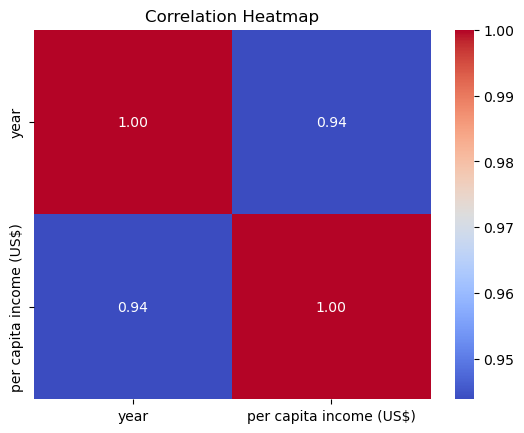

In [80]:
# correlation analysis
correlation_matrix = data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data visualization

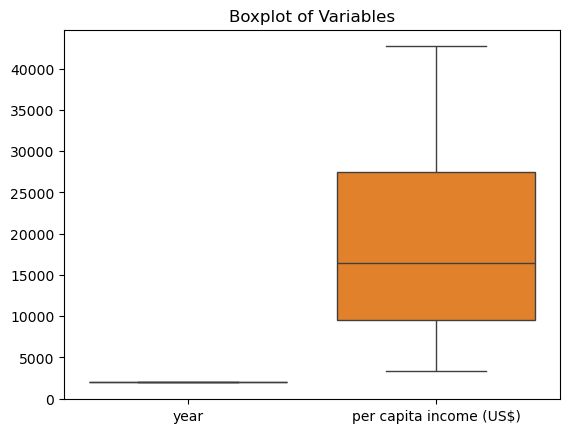

In [17]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

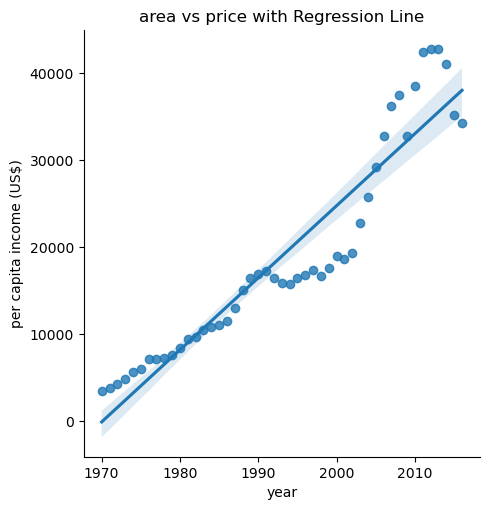

In [19]:
sns.lmplot(x='year', y='per capita income (US$)', data=data)
plt.title('area vs price with Regression Line')
plt.show()

### Spliting the Data into One X & One Y

In [47]:
X = data.iloc[:, :1].values
Y = data.iloc[:, 1].values 

### Spliting the data into test data & train data

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

### Linear Regression Modeling & Predictions

In [51]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_pred=mlr.predict(x_test)
y_pred

array([22126.36537343, 31970.12186981, 21306.05233206, 35251.37403527,
       19665.42624933, 29509.18274571,  9821.66975295, 15563.86104251,
        3259.16542203, 20485.7392907 ,  6540.41758749,  2438.85238067,
        4899.79150476, 32790.43491117, 27048.24362162])

### Model coefficients & Intercept

In [53]:
print("Coefficient:",mlr.coef_) #m
print("Intercept:",mlr.intercept_) #C

Coefficient: [820.31304136]
Intercept: -1616038.7782324494


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3162.9294154442787
14000295.245757796
3741.696840439882


### Creating DataFrame to view Results

In [57]:
Results=pd.DataFrame(columns=['Actual_income','Predicted_income'])
Results['Actual_income']=y_test
Results['Predicted_income']=y_pred
Results=Results.reset_index()
Results.head()

,index,Actual_income,Predicted_income
0,0,17310.75775,22126.365373
1,1,32755.17682,31970.121870
2,2,16699.82668,21306.052332
3,3,42676.46837,35251.374035
4,4,15755.82027,19665.426249


### r2 value calculations

In [59]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9005705995581696

### Visualization of actual & predicted values

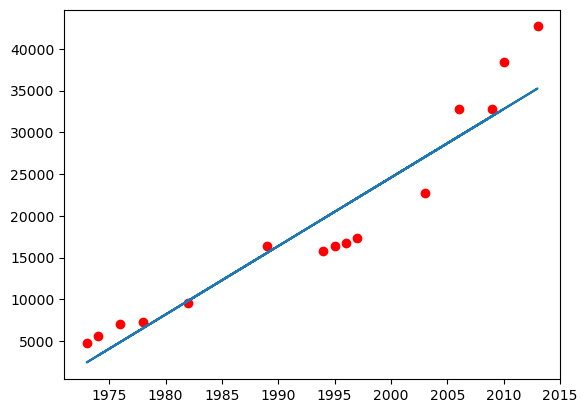

In [63]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test,y_pred)
plt.show()

In [95]:
#END